In [1]:
#Corporate financing activities performance and managing financial risks
#what effect of people working from home
#policy
#government program
#how x affect y
# event driven 


In [2]:
#Exploratory Statistical Analysis

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import scipy.stats as sst
from scipy import stats
import statsmodels.api as sm

In [4]:
tickers=['TSLA','^GSPC','^IRX']
sec_data=pd.DataFrame()
for t in tickers:
    sec_data[t]=pdr.DataReader(t,data_source='yahoo',start='2020-1-1')['Adj Close']

In [5]:
tickers = ['TSLA']
a=pd.DataFrame()
for t in tickers: 
    a[t]=pdr.DataReader(t,data_source='yahoo',start='2020-1-1')['Adj Close']
a.describe()

,TSLA
count,615.000000
mean,599.971930
std,307.101431
min,72.244003
25%,321.333008
50%,661.750000
75%,819.925018
max,1229.910034


In [6]:
sec_Tesla_returns=a/a.shift(1)-1
sec_Tesla_returns=sec_Tesla_returns.dropna(axis=0, how='any') 

In [7]:
sec_Tesla_returns.tail()

,TSLA
Date,
2022-06-03,-0.092194
2022-06-06,0.016047
2022-06-07,0.002546
2022-06-08,0.012475
2022-06-09,-0.008931


In [8]:
Annual_return_Tesla=sec_Tesla_returns.mean()*250
Annual_return_Tesla

TSLA    1.138026
dtype: float64

In [9]:
Daily_Average_return_Tesla=sec_Tesla_returns.mean()
Daily_Average_return_Tesla

TSLA    0.004552
dtype: float64

In [10]:
Annual_Average_risklevel_Tesla=(sec_Tesla_returns.std()*250)**0.05
Annual_Average_risklevel_Tesla

TSLA    1.130758
dtype: float64

In [11]:
Daily_Average_risklevel_Tesla=sec_Tesla_returns.std()
Daily_Average_risklevel_Tesla

TSLA    0.046715
dtype: float64

In [12]:
skew_TSLA=sec_Tesla_returns.skew()
skew_TSLA

TSLA    0.07657
dtype: float64

In [13]:
Kurt_TSLA=sec_Tesla_returns.kurt()
Kurt_TSLA

TSLA    2.946738
dtype: float64

In [14]:
import scipy.stats as sst
nd=sst.norm(Daily_Average_return_Tesla,Daily_Average_risklevel_Tesla)

In [15]:
Prob_negative_TSLA_return=nd.cdf(0)
Prob_negative_TSLA_return

array([0.46118676])

(array([ 0.1988228 ,  0.        ,  0.        ,  0.1988228 ,  0.1988228 ,
         0.        ,  0.1988228 ,  0.        ,  0.        ,  0.1988228 ,
         0.3976456 ,  0.5964684 ,  0.        ,  0.3976456 ,  0.5964684 ,
         1.19293681,  0.5964684 ,  2.18705082,  1.39175961,  3.77763323,
         4.17527883,  4.57292443,  7.35644365,  7.95291206, 11.33289968,
        12.52583649, 12.12819089, 10.93525408,  8.15173486,  5.16939284,
         6.56115245,  5.36821564,  2.58469642,  1.78940521,  2.58469642,
         1.19293681,  1.19293681,  0.3976456 ,  0.99411401,  0.5964684 ,
         0.        ,  0.79529121,  0.79529121,  0.        ,  0.        ,
         0.1988228 ,  0.        ,  0.        ,  0.1988228 ,  0.3976456 ]),
 array([-0.21062826, -0.20243672, -0.19424519, -0.18605365, -0.17786211,
        -0.16967057, -0.16147903, -0.1532875 , -0.14509596, -0.13690442,
        -0.12871288, -0.12052135, -0.11232981, -0.10413827, -0.09594673,
        -0.08775519, -0.07956366, -0.07137212, -0

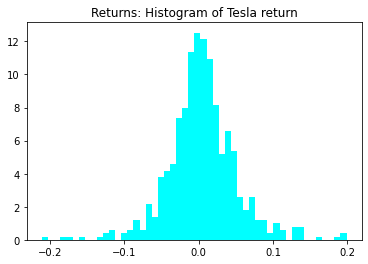

In [16]:
H1=sec_Tesla_returns
H1=H1.dropna()
plt.title('Returns: Histogram of Tesla return') 
plt.hist(H1,bins=50,density=1,color='cyan')

In [17]:
Annual_Average_risklevel_Tesla

TSLA    1.130758
dtype: float64

# Regression test session

In [18]:
sec_returns=sec_data/sec_data.shift(1)-1
sec_returns['^IRX']=sec_data['^IRX']/(100*250)

In [19]:
sec_returns=sec_returns.dropna(axis=0,how='any')

In [20]:
X1=sm.add_constant(sec_returns['^GSPC']-sec_returns['^IRX'])

In [21]:
reg=sm.OLS(sec_returns['TSLA']-sec_returns['^IRX'],X1).fit()

In [22]:
# Compare with market performance

In [23]:
Slope,intercept,r_value,p_value,std_err=stats.linregress(sec_returns['^GSPC']-sec_returns['^IRX'],
                                                         sec_returns['TSLA']-sec_returns['^IRX'])

In [24]:
sec_beta=pd.DataFrame(np.nan,index=tickers,columns=['beta','intercept'])
sec_beta

,beta,intercept
TSLA,NaN,NaN


In [25]:
for t in tickers:
    slope,intercept,r_value,p_value,std_err=stats.linregress(sec_returns['^GSPC'],sec_returns[t])
    sec_beta.loc[t,'beta']=slope
    sec_beta.loc[t,'intercept']=intercept

In [26]:
sec_beta

,beta,intercept
TSLA,1.434456,0.003872


Implementing the Fama-French three-factor model in Python

In [27]:
from pandas_datareader.famafrench import get_available_datasets

In [28]:
from pandas_datareader import data as pdr
ff=pdr.DataReader('F-F_Research_Data_Factors_daily','famafrench',start='2020-1-1')[0]

In [29]:
mm=pdr.DataReader('F-F_Momentum_Factor_daily','famafrench',start='2020-1-1')[0]
list(mm.columns.values)
mm.columns=['Mom']

In [30]:
list(ff.columns.values)

['Mkt-RF', 'SMB', 'HML', 'RF']

In [31]:
mm.columns=['Mom']

In [32]:
factors=pd.merge(ff,mm,left_index=True,right_index=True)

In [33]:
tickers=['TSLA','^GSPC','^IRX']
sec_data=pd.DataFrame()
for t in tickers:
    sec_data[t]=pdr.DataReader(t,data_source='yahoo',start='2020-1-1')['Adj Close']

In [34]:
sec_returns=(sec_data/sec_data.shift(1)-1)*100

In [35]:
sec_returns.head()

,TSLA,^GSPC,^IRX
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,2.963319,-0.705987,-1.471569
2020-01-06,1.925466,0.353337,1.018329
2020-01-07,3.880053,-0.280324,0.806449
2020-01-08,4.920485,0.490245,-0.466665


In [36]:
all=pd.merge(sec_returns,factors,left_index=True, right_index=True)

In [37]:
all=all.dropna(axis=0,how='any')
all.head()

,TSLA,^GSPC,^IRX,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,,,
2020-01-03,2.963319,-0.705987,-1.471569,-0.67,0.38,0.00,0.006,0.03
2020-01-06,1.925466,0.353337,1.018329,0.36,-0.06,-0.55,0.006,-0.69
2020-01-07,3.880053,-0.280324,0.806449,-0.19,-0.01,-0.24,0.006,0.01
2020-01-08,4.920485,0.490245,-0.466665,0.47,-0.06,-0.64,0.006,0.92
2020-01-09,-2.194501,0.665526,0.468853,0.65,-0.65,-0.48,0.006,0.73


In [38]:
all['TSLA-RF']=all['TSLA']-all['RF']

In [39]:
x=all['Mkt-RF']
x1=sm.add_constant(x)
reg=sm.OLS(all['TSLA-RF'],x1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TSLA-RF   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     211.7
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.82e-41
Time:                        15:12:39   Log-Likelihood:                -1640.2
No. Observations:                 586   AIC:                             3284.
Df Residuals:                     584   BIC:                             3293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4186      0.165      2.544      0.011       0.095       0.742
Mkt-RF         1.4610      0.100     14.549      0.000       1.264       1.658
==============================================================================
Omnibus:                       63.273   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.397
Skew:                           0.283   Prob(JB):                     6.62e-73
Kurtosis:                       6.646   Cond. No.                         1.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
sec_beta=pd.DataFrame(np.nan,index=tickers,columns=['const','Mkt-RF','SMB','HML','Mom'])
sec_beta

,const,Mkt-RF,SMB,HML,Mom
TSLA,NaN,NaN,NaN,NaN,NaN
^GSPC,NaN,NaN,NaN,NaN,NaN
^IRX,NaN,NaN,NaN,NaN,NaN


In [41]:
for t in tickers:
    x=all[['Mkt-RF','SMB','HML','Mom']]
    x1=sm.add_constant(x)
    y=all[t]-all['RF']
    reg=sm.OLS(y,x1).fit()
    sec_beta.loc[t,:]=reg.params

In [42]:
sec_beta

,const,Mkt-RF,SMB,HML,Mom
TSLA,0.425651,1.431902,0.955528,-0.681917,0.251979
^GSPC,-0.003406,0.989115,-0.149605,0.036668,-0.002243
^IRX,0.564947,0.363218,-13.451333,1.267962,-0.904954


In [43]:
# Sharpe ratio
(Annual_return_Tesla-all['RF'].mean())/Annual_Average_risklevel_Tesla

TSLA    1.005875
dtype: float64

In [44]:
import pandas as pd 
import yfinance as yf

In [45]:
import pandas as pd
import yfinance as yf
from arch import arch_model

In [46]:
RISKY_ASSET = 'TSLA'
START_DATE = '2020-01-01'
END_DATE = '2022-5-11'

In [47]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

[*********************100%***********************]  1 of 1 completed


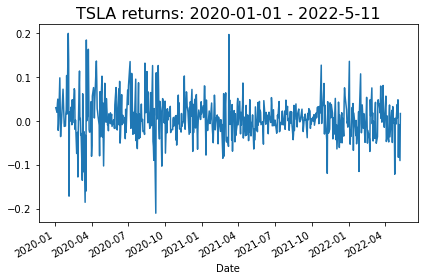

Average return: 0.48%


In [48]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}', 
             fontsize=16)

plt.tight_layout()
plt.show()

print(f'Average return: {100 * returns.mean():.2f}%')

In [49]:
# Average daily return

Average return: 0.48%


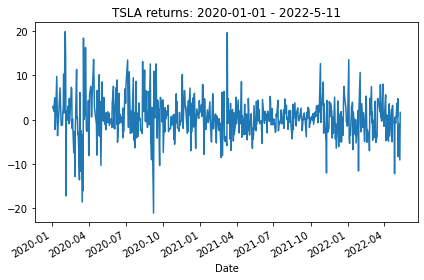

In [50]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
print(f'Average return: {round(returns.mean(), 2)}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}');

plt.tight_layout()
plt.show()


# Economic model Prediction 
First part-Volatility Forecasting

In [51]:
#Company performance stock price

Autoregressive conditional heteroskedasticity (ARCH) is a statistical model used to analyze volatility in time series in order to forecast future volatility. 

In the ARCH(q) process the conditional variance is specified as a linear function of past sample variances only, whereas the GARCH(p, q) process allows lagged conditional variances to enter as well. 

In [52]:
# Volatility Forecasting Explaining stock returns' volatility with ARCH models

In [53]:
model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0, q=0)
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                       ARCH   Log-Likelihood:               -1747.86
Distribution:                  Normal   AIC:                           3499.72
Method:            Maximum Likelihood   BIC:                           3508.49
                                        No. Observations:                  593
Date:                Thu, Jun 09 2022   Df Residuals:                      593
Time:                        15:12:42   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         19.1156      2.119      9.022  1.839e-19   [ 14.96

Arch model interpretation:

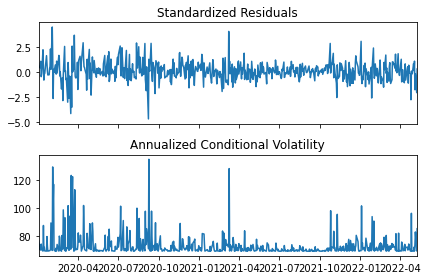

In [54]:
model_fitted.plot(annualize='D')

plt.tight_layout()
# plt.savefig('images/ch5_im3.png')
plt.show()

In [55]:
# Garch Model*


ARCH models are a popular class of volatility models that use observed values of returns or residuals as volatility shocks.

In [56]:
model = arch_model(returns, mean='Zero', vol='GARCH', 
                   p=1, o=0, q=1)

In [57]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1709.91
Distribution:                  Normal   AIC:                           3425.82
Method:            Maximum Likelihood   BIC:                           3438.97
                                        No. Observations:                  593
Date:                Thu, Jun 09 2022   Df Residuals:                      593
Time:                        15:12:43   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4306      0.519      0.830      0.407    [ -

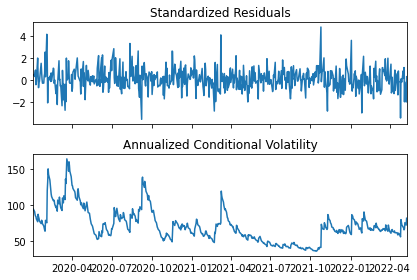

In [58]:
model_fitted.plot(annualize='D')

plt.tight_layout()
plt.show()

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [60]:
import pandas as pd
import yfinance as yf
from arch import arch_model

In [61]:
RISKY_ASSET = 'TSLA'
START_DATE = '2020-01-01'
END_DATE = '2022-05-18'

In [62]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  1 of 1 completed
Downloaded 599 rows of data.


Average return: 0.47%


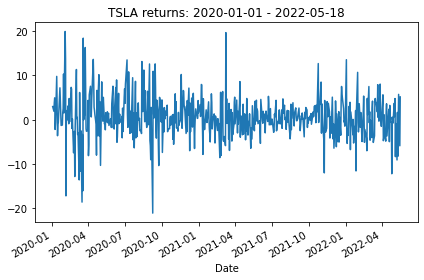

In [63]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
print(f'Average return: {round(returns.mean(), 2)}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}');

plt.tight_layout()
# plt.savefig('images/ch5_im1.png')
plt.show()


# Different Stock price comparison within the industry

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [65]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'TSLA']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [66]:
company_list = [AAPL, GOOG, MSFT, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT","TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

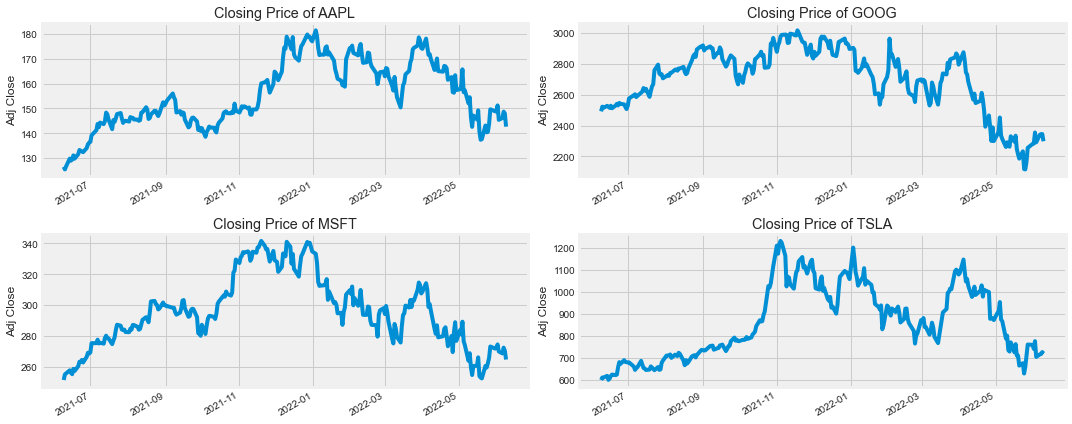

In [67]:
## Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

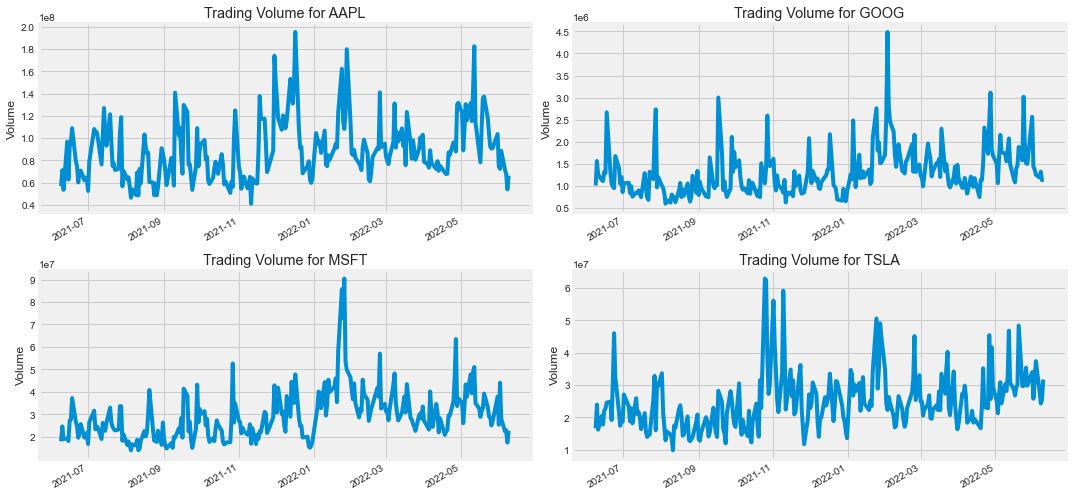

In [68]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Trading Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [69]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Moving averages are usually calculated to identify the trend direction of a stock or to determine its support and resistance levels. It is a trend-following—or lagging—indicator because it is based on past prices. The longer the time period for the moving average, the greater the lag.

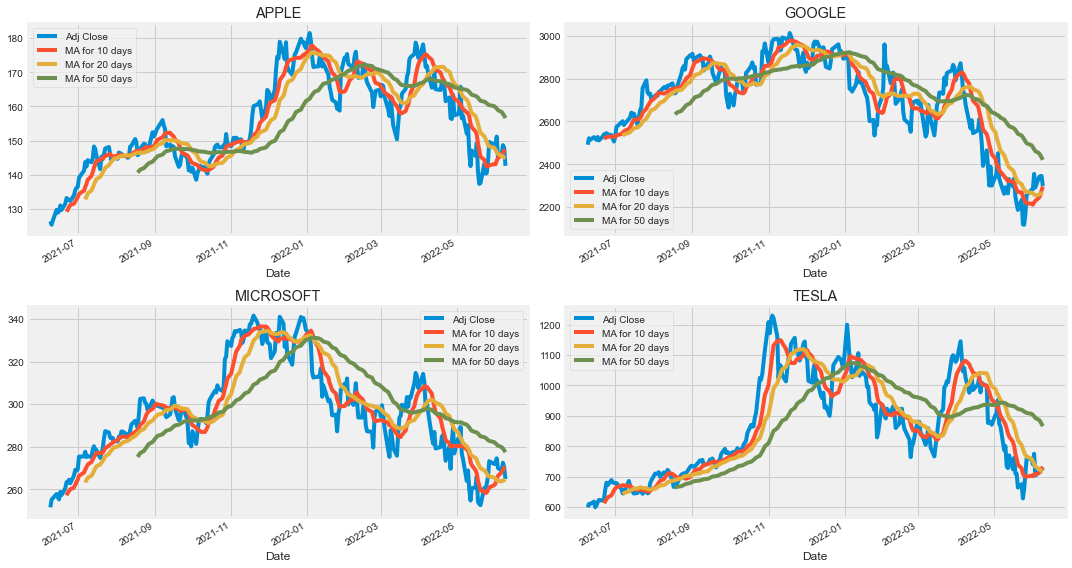

In [70]:
#moving average of the various stocks

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()

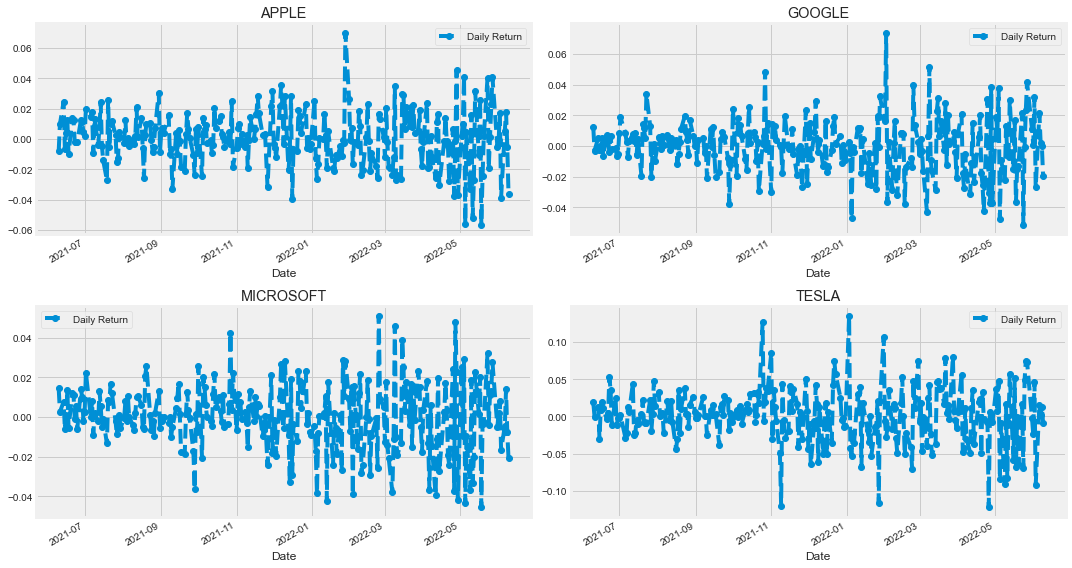

In [71]:
# Daily return of stock average
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

fig.tight_layout()

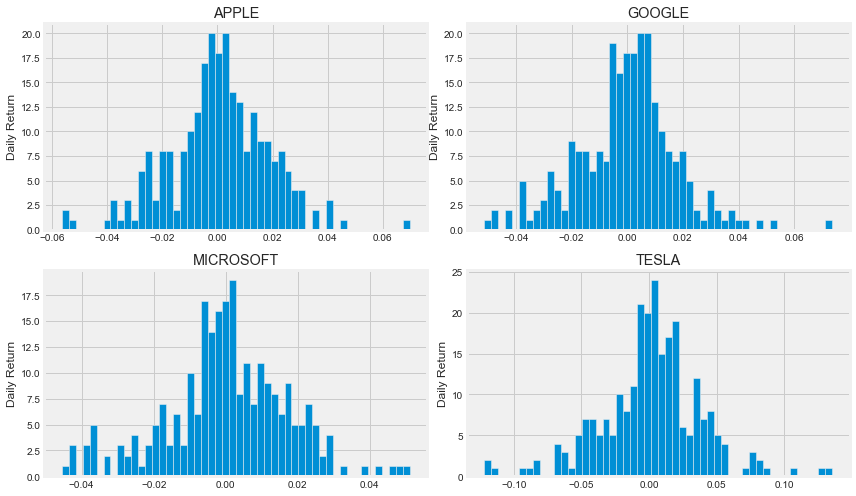

In [72]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

5. How much value do we put at risk by investing in a particular stock

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

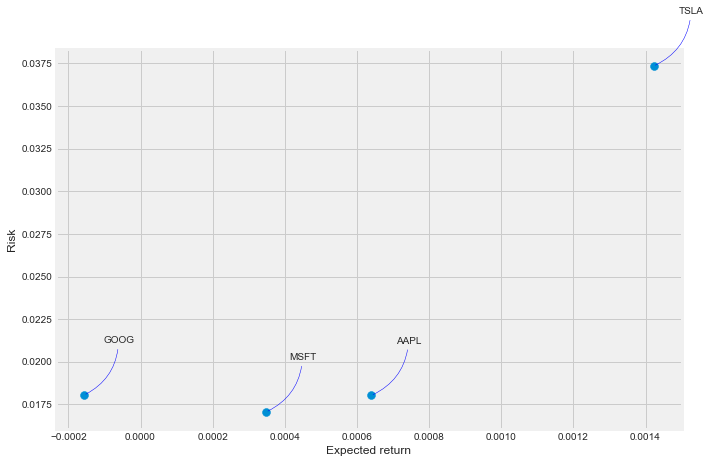

In [73]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 
tech_rets = closing_df.pct_change()
tech_rets.head()
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Utilizing LSTM to predict the stock price

#Drawbacks:LSTMs take longer to train.
LSTMs require more memory to train.
LSTMs are easy to overfit.
Dropout is much harder to implement in LSTMs.
LSTMs are sensitive to different random weight initializations.

In [74]:
df1 = DataReader('TSLA', data_source='yahoo', start='2020-01-01', end=datetime.now())
# Show teh data
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


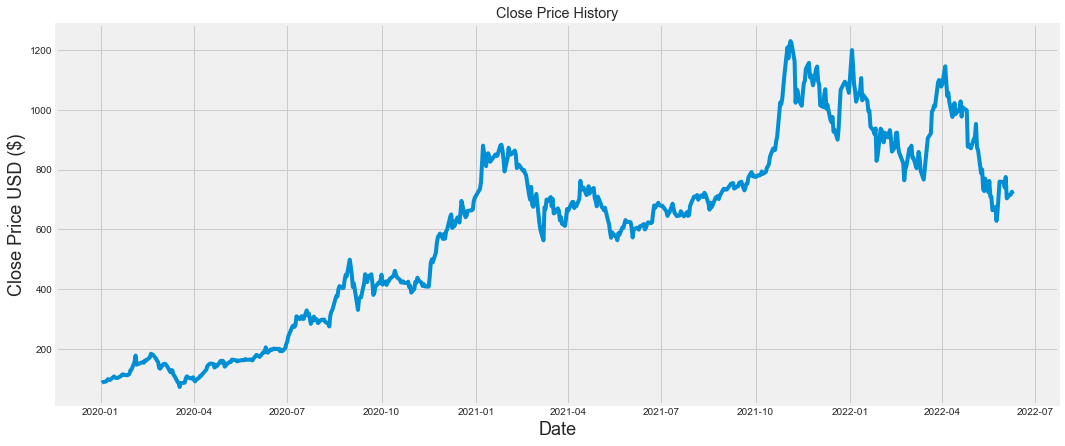

In [75]:
plt.figure(figsize=(16,7))
plt.title('Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [76]:
# Create a new dataframe with only the 'Close column 
data = df1.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

585

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [78]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01192745, 0.01413015, 0.01560381, 0.01863058, 0.02261792,
       0.02075209, 0.02020098, 0.02827067, 0.03052694, 0.02717191,
       0.02630637, 0.02578982, 0.03213016, 0.03599311, 0.0364492 ,
       0.03517421, 0.03399944, 0.03553356, 0.03796777, 0.04830236,
       0.04998851, 0.07234901, 0.09084485, 0.06452293, 0.06698651,
       0.06683274, 0.07084253, 0.0713781 , 0.07015321, 0.07649529,
       0.07580942, 0.0858935 , 0.09608988, 0.09297846, 0.09325314,
       0.08164185, 0.07578869, 0.0721417 , 0.05490012, 0.05299802,
       0.06606395, 0.06639048, 0.06707979, 0.06276767, 0.05912931,
       0.04263405, 0.04908323, 0.04716559, 0.03443653, 0.03202996,
       0.01448604, 0.01191708, 0.        , 0.01147481, 0.0114558 ,
       0.01262367, 0.02483963, 0.03075671, 0.02884079, 0.02645668])]
[0.024343807673987097]

[array([0.01192745, 0.01413015, 0.01560381, 0.01863058, 0.02261792,
       0.02075209, 0.02020098, 0.02827067, 0.03052694, 0.02717191,
       0.02630637, 0.02578982, 0.0

In [79]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

525/525 [==============================] - 18s 26ms/step - loss: 0.0066


In [80]:
# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 860ms/step


57.39244622195737

In [81]:
# test value 

the root mean squared error (RMSE) is 62.48338090698431

<ipython-input-82-499431c3d85f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


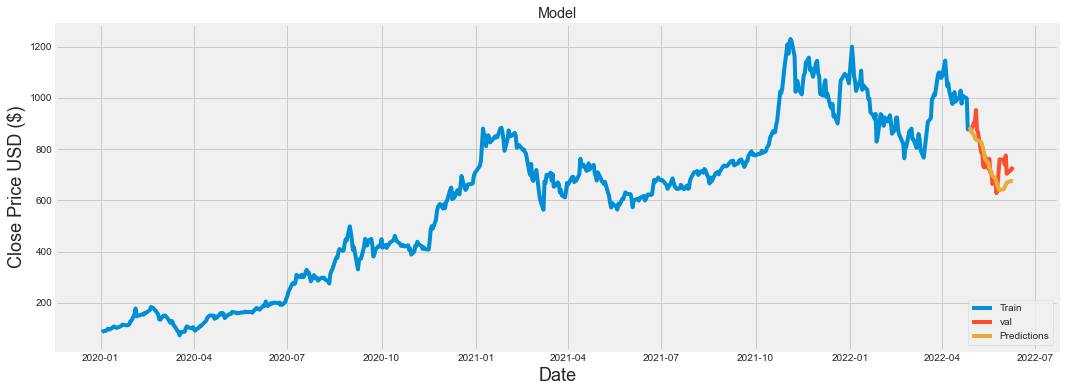

In [82]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train',"val" ,'Predictions'], loc='lower right')
plt.show()

In [83]:
valid

,Close,Predictions
Date,,
2022-04-28,877.510010,886.040588
2022-04-29,870.760010,869.877991
2022-05-02,902.940002,854.159790
2022-05-03,909.250000,843.105652
2022-05-04,952.619995,836.234802
2022-05-05,873.280029,836.184998
2022-05-06,865.650024,832.943359
2022-05-09,787.109985,827.829346
2022-05-10,800.039978,815.303223


In [84]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [87]:
# First, we get the data
dataset =  DataReader('TSLA', data_source='yahoo', start='2020-01-01', end=datetime.now())
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [88]:
# Checking for missing values
training_set = dataset[:'2020'].iloc[:,1:2].values
test_set = dataset['2021':].iloc[:,1:2].values

In [89]:
# We have chosen 'High' attribute for prices. Let's see what it looks like

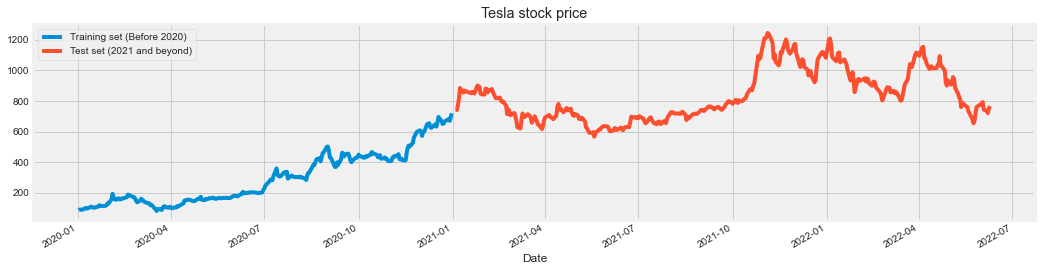

In [90]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2020'].plot(figsize=(16,4),legend=True)
dataset["High"]['2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2020)','Test set (2021 and beyond)'])
plt.title('Tesla stock price')
plt.show()

In [91]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [92]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,253):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [93]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

#The current version version uses a dense GRU network with 50 units in previous version

First, LSTM cell takes the previous memory state Ct-1 and does element wise multiplication with forget gate (f) to decide if present memory state Ct. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

In [94]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
7/7 [==============================] - 9s 90ms/step - loss: 0.1013
Epoch 2/50
7/7 [==============================] - 1s 81ms/step - loss: 0.0134
Epoch 3/50
7/7 [==============================] - 1s 80ms/step - loss: 0.0167
Epoch 4/50
7/7 [==============================] - 1s 78ms/step - loss: 0.0125
Epoch 5/50
7/7 [==============================] - 1s 84ms/step - loss: 0.0171
Epoch 6/50
7/7 [==============================] - 1s 78ms/step - loss: 0.0101
Epoch 7/50
7/7 [==============================] - 1s 79ms/step - loss: 0.0317
Epoch 8/50
7/7 [==============================] - 1s 79ms/step - loss: 0.0115
Epoch 9/50
7/7 [==============================] - 1s 82ms/step - loss: 0.0113
Epoch 10/50
7/7 [==============================] - 1s 89ms/step - loss: 0.0130
Epoch 11/50
7/7 [==============================] - 1s 95ms/step - loss: 0.0184
Epoch 12/50
7/7 [==============================] - 1s 88ms/step - loss: 0.0134
Epoch 13/50
7/7 [==============================] - 1s 83ms/st

In [95]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2020'],dataset["High"]['2021':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [96]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,416):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

12/12 [==============================] - 2s 26ms/step


In [97]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real TESLA Stock Price')
    plt.plot(predicted, color='blue',label='Predicted TESLA Stock Price')
    plt.title('TESLA Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('TESLA Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

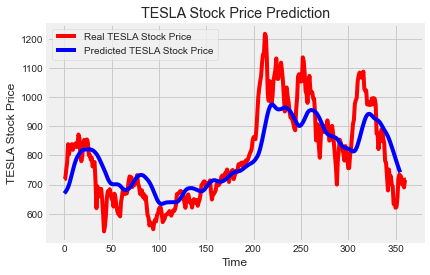

In [98]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [99]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

57.39244622195737